In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import random

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

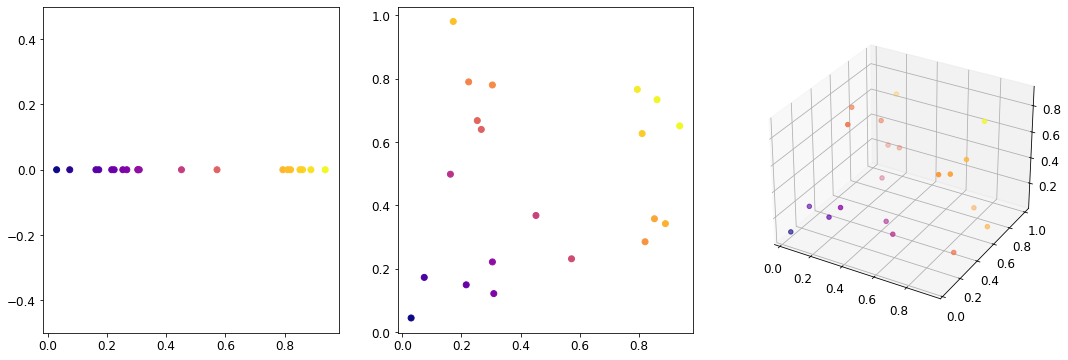

In [2]:
x = np.array([random.random() for i in range(20)])
y = np.array([random.random() for i in range(20)])
z = np.array([random.random() for i in range(20)])
y0 = [0 for i in range(20)]

plt.figure(figsize=(18,6))
ax = plt.subplot(1,3,1)
plt.scatter(x, y0, c=x, cmap='plasma')
plt.ylim(-.5, .5)

ax = plt.subplot(1,3,2)
plt.scatter(x, y, c=np.sqrt(x*x + y*y), cmap='plasma')


ax = plt.subplot(133, projection='3d')
ax.scatter(x, y, z, c=np.sqrt(x*x + y*y + z*z), cmap='plasma')

plt.show()

In [3]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

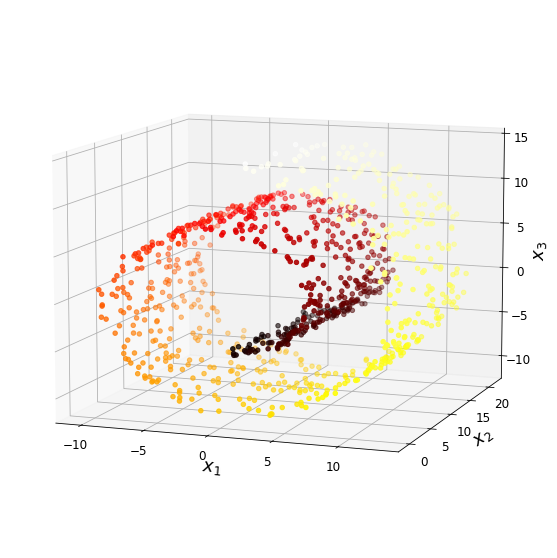

In [4]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

#save_fig("swiss_roll_plot")
plt.show()

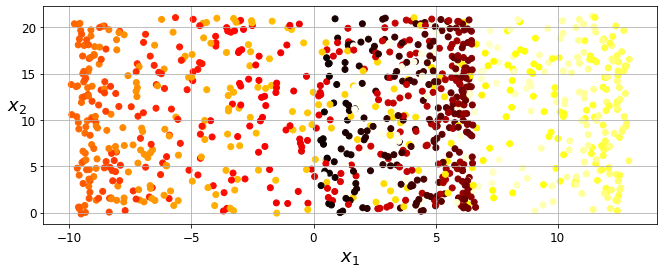

In [5]:
plt.figure(figsize=(11, 4))

#plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

#save_fig("squished_swiss_roll_plot")
plt.show()

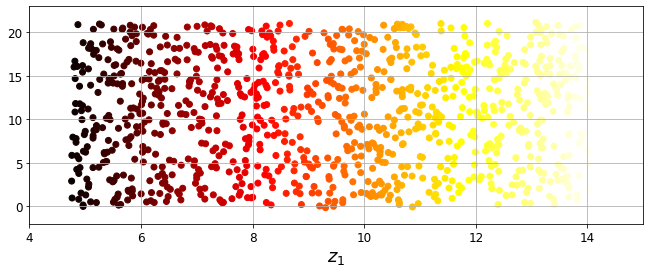

In [6]:
plt.figure(figsize=(11, 4))
#plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

In [7]:
def produce_sample(m = 60, w1=0.1, w2=0.3, noise=0.1):
    np.random.seed(42)
    angles = np.random.rand(m) * 3 * np.pi / 2.0 - 0.5
    X = np.empty((m, 3))
    X[:, 0] = np.cos(angles) + np.sin(angles)/2.0 + noise * np.random.randn(m) / 2.0
    X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2.0
    X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)
    #print("X = ", X)
    return X

Text(0.5, 0, 'X3')

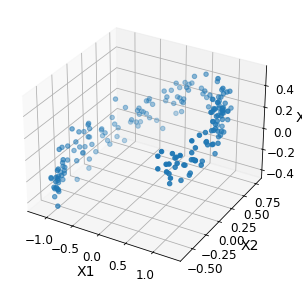

In [8]:
X = produce_sample(200)

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("X3")

c1 =  [-0.95380288 -0.24882589 -0.16836191]
c2 =  [ 0.28709268 -0.92002277 -0.26671315]
c3 =  [ 0.08853165  0.30272724 -0.94895646]


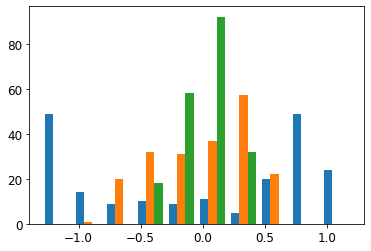

In [9]:
# centralizando a distribuição
X_centered = X - X.mean(axis=0)
plt.figure(4)
plt.hist(X_centered)
# obtendo a decomposição da matriz de treinamento com o SVD do numpy
# o np.linalg.svd retorna as matrizes U, Sigma e a matriz transposta de V:
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]                      # para obter as componentes principais, tomamos a transposta(Vt)
c2 = Vt.T[:, 1]
print("c1 = ", c1)
print("c2 = ", c2)
print("c3 = ", Vt.T[:,2])

In [10]:
W2 = Vt.T[:, :2]
print("W2 = ", W2)

W2 =  [[-0.95380288  0.28709268]
 [-0.24882589 -0.92002277]
 [-0.16836191 -0.26671315]]


Text(0, 0.5, 'X2')

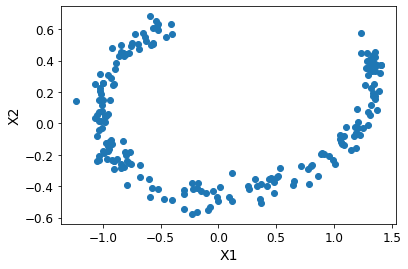

In [11]:
X2D = X_centered.dot(W2) # projetando a matriz X no plano definido pelas componentes principais.
plt.figure(5)
plt.scatter(X2D[:, 0], X2D[:, 1])
plt.xlabel("X1")
plt.ylabel("X2")

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)  # aqui você pode especificar o número de componentes principais
X2D = pca.fit_transform(X)   # aplica o PCA na amostra de treinamento, para 2 dimensões (n_components=2)

In [13]:
Vt = pca.components_
print(Vt)

[[ 0.95380288  0.24882589  0.16836191]
 [-0.28709268  0.92002277  0.26671315]]


In [14]:
components_ = pca.components_.T
print(components_)

[[ 0.95380288 -0.28709268]
 [ 0.24882589  0.92002277]
 [ 0.16836191  0.26671315]]


In [15]:
c1 = components_[:, 0]
print(c1)

[0.95380288 0.24882589 0.16836191]


In [16]:
pca.explained_variance_ratio_

array([0.8685729 , 0.12194395])

In [17]:
X = produce_sample(200)
pca = PCA()
pca.fit(X)
print("pca.explained_variance_ratio_ = ", pca.explained_variance_ratio_)

pca.explained_variance_ratio_ =  [0.8685729  0.12194395 0.00948315]


In [18]:
# calcular a soma cumulativa das variâncias para cada nova dimensão:
soma_cumulativa = np.cumsum(pca.explained_variance_ratio_)
print("cumsum = ", soma_cumulativa)

cumsum =  [0.8685729  0.99051685 1.        ]


In [19]:
# encontrar o valor da dimensão (índice do vetor 'cumsum' + 1) que satisfaz os 95% de variância
d = np.argmax(soma_cumulativa >= 0.95) + 1
print("número de dimensões que engloba >=95% da variância = ", d)

número de dimensões que engloba >=95% da variância =  2


In [20]:
pca = PCA(n_components=d)
X2D = pca.fit_transform(X)

In [21]:
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X)

In [22]:
from six.moves import urllib
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1)
    mnist.target = mnist.target.astype(np.int64)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

In [23]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

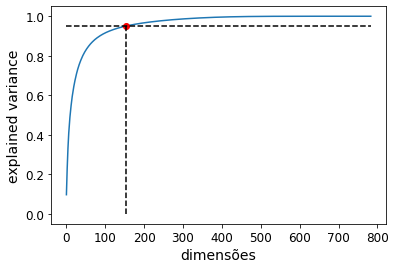

In [24]:
pca = PCA()
X_new = pca.fit(X_train)
n_train_features = X_train.shape[1]
cumsum = np.cumsum(pca.explained_variance_ratio_)

## plotar o gráfico de explained_variance Vs. n_dimensões:
plt.plot(cumsum)
plt.xlabel("dimensões")
plt.ylabel("explained variance")
d_95 = np.argmax(cumsum > 0.95) + 1  # n_dimensoes com explained variance ratio >= 0.95
exp_var = 0.95
plt.plot(d_95, exp_var, "ro")
x = np.arange(0, n_train_features)
y = 0*x + 0.95
plt.plot(x, y, 'k--')
y = np.linspace(0, exp_var)
x = 0*y + d_95
plt.plot(x, y, 'k--')

In [25]:
d_95

154

In [26]:
print("numero de features de cada instanica dos dados: ", n_train_features)
print("numero de features apos aplicacao do PCA com 95 de variancia: ", d_95)

numero de features de cada instanica dos dados:  784
numero de features apos aplicacao do PCA com 95 de variancia:  154


In [27]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    #instances_np= instances.to_numpy()
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Text(0.5, 1.0, 'Original')

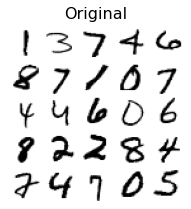

In [28]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
X_train_np=X_train[::2100].to_numpy()
plot_digits(X_train_np)
#print(X_train_np)
plt.title("Original", fontsize=16)

In [29]:
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced) #para reconstrução a partir da imagem de dimensionalidade reduzida

Text(0.5, 1.0, 'Compressed')

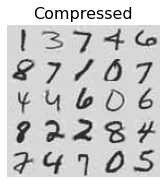

In [30]:
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

## Exercícios:

Faça o carregamento do conjunto de dados MNIST e divida-o em um conjunto de treinamento e outro de teste (60k instâncias para treinamento e o restante, 10k, para teste).
treine um classificador Random Forest

conte o tempo de treinamento

avalie o modelo resultante na amostra de teste

Em seguida, use o PCA para reduzir a dimensionalidade dos dados, com uma explained variance ratio de 95%.
Treine um classificador Random Forest no conjunto de dados de dimensionalidade reduzida

meça o tempo de processamento do treinamento. O quão mais rápido é, comparado ao treinamento sem redução de dimensionalidade?

avalie o classificador na amostra de teste. Como ele se compara com o anterior?

In [31]:
from six.moves import urllib
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1)
    mnist.target = mnist.target.astype(np.int64)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]

X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

In [32]:
from sklearn.ensemble import RandomForestClassifier
import time

rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)


t0 = time.time()
rnd_clf.fit(X_train, y_train)
t1 = time.time()

print("O treinamento levou {:.2f}s".format(t1 - t0))

O treinamento levou 4.84s


In [33]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9492

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [35]:
rnd_clf2 = RandomForestClassifier(n_estimators=10, random_state=42)
t0 = time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t1 = time.time()
print("O treinamento levou {:.2f}s".format(t1 - t0))

O treinamento levou 14.38s


In [36]:
X_test_reduced = pca.transform(X_test)

y_pred = rnd_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.8925

In [ ]:
from sklearn.svm import SVC

log_clf = SVC(random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()
print("Training took {:.2f}s".format(t1 - t0))

In [ ]:
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
log_clf = SVC(random_state=42)
t0 = time.time()
log_clf.fit(X_train_reduced, y_train)           #treinando o SVM com o dataset reduzido dimensionalmente com o PCA.
t1 = time.time()
print("Training took {:.2f}s".format(t1 - t0))

In [ ]:
y_pred = log_clf.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

## Exercício:

Teste a redução de dimensionalidade para um outro modelo, como por exemplo o "Logistic Regression".

Fazer os gráficos de visualização dos dados MNIST acima, com e sem redução de dimensionalidade.